In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from PlotTools import plot_tools as PTs

In [3]:
plt.rcParams['figure.figsize']=(15,15)
%matplotlib inline


In [4]:
GIEMS_DIR='/prj/ALANIS/ALANIS_Products/Regional_Wetland/Global_1993_2007/'

GIEMS_FILE=GIEMS_DIR+'wetland_new_1993_2007_Global_fraction_0.50.nc'

WFDEI_DIR='/users/eow/edwcom/WFD_EI/'

VGsoilfile=WFDEI_DIR+'SoilProperties_wfdei_VanGenuchten_2D.nc'
BCsoilfile=WFDEI_DIR+'SoilProperties_wfdei_BrookesCorey_2D.nc'


In [5]:
inf=nc.Dataset(GIEMS_FILE)
EO_wetl=inf.variables['fwetl'][:]
time=nc.num2date(inf.variables['time'][:],units=inf.variables['time'].units)
nTIME=len(time)
lats=inf.variables['latitude'][:]
lons=inf.variables['longitude'][:]
inf.close()

In [6]:
VGinf=nc.Dataset(VGsoilfile,'r')
VG_DATA_DICT={}
for var in VGinf.variables:
    if var not in ['lot','lat']:
        VG_DATA_DICT[var]=VGinf.variables[var][:].squeeze()

lons_2d,lats_2d=np.meshgrid(VGinf.variables['lon'][:],VGinf.variables['lat'][:])
        
VGinf.close()

b


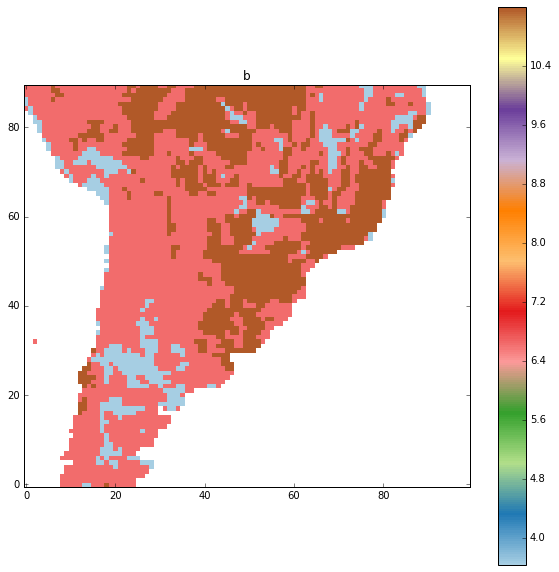

satcon


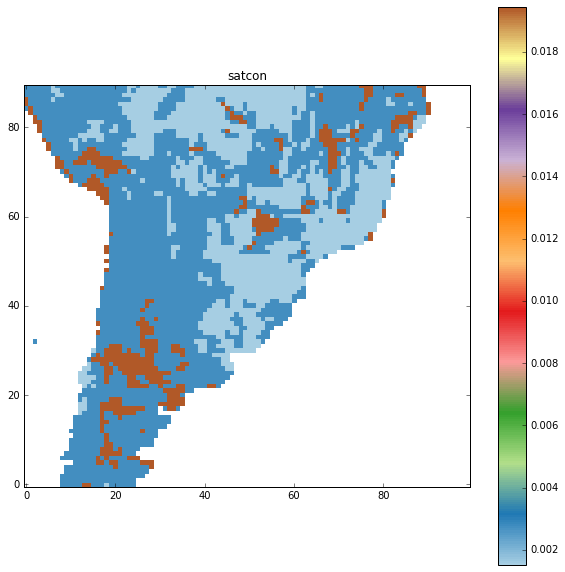

sathh


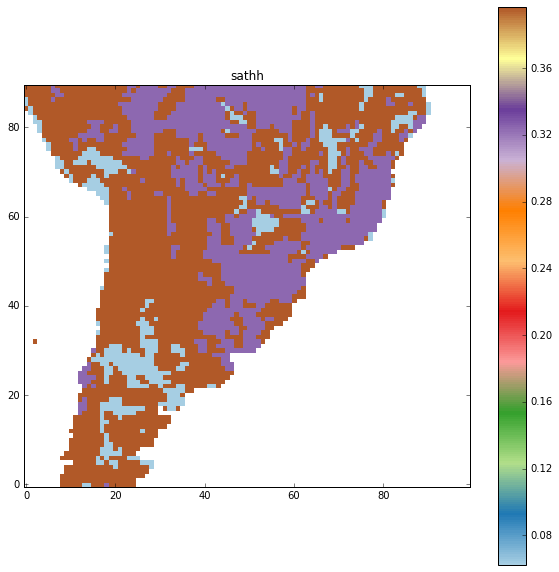

In [7]:

#for var in VG_DATA_DICT:
for var in ['b','satcon','sathh']:
    print(var)
    plt.figure(figsize=(10,10))
    plt.imshow(VG_DATA_DICT[var][80:170,200:300],origin='bottom',cmap='Paired',interpolation='nearest')
    plt.colorbar()
    plt.title(var)
    plt.show()
    


In [44]:
help(PTs.plot_map)

Help on function plot_map in module PlotTools.plot_tools:

plot_map(DATA, LONS, LATS, DATA2=None, LONS2=None, LATS2=None, GREYMASK=None, MASKCOLOR='grey', DATA_RANGE=None, LON_RANGE=None, LAT_RANGE=None, MAP_TYPE='Mesh', COLOURS=None, MPL_CBAR=None, CMAP=None, NLEVELS=None, CLEVELS=None, TickLEVELS=None, NTICKS=None, CBAR_ORIENTATION='horizontal', CBAR_SIZE='6%', CBAR_PAD=0.3, INTERPOLATE_COLOURS=False, TICK_FORMAT='%.3f', CBAR_TICK_LENGTH=10, WIDTH=12, HEIGHT=8, CBAR_LABEL=None, PLOT_TITLE=None, FONTSIZES=[10, 10, 12, 12], iDISPLAY='N', iCLOSE='N', FILE_PLOT=None, iORIENTATION='landscape', FIGURE=None, AXIS=None, SET_OVER=None, SET_UNDER=None, LATDEL=None, LONDEL=None, RIVERS=False, RESOLUTION='i', PROJECTION='cyl', LEFT_FRAC=0.0, RIGHT_FRAC=0.0, BOTTOM_FRAC=0.0, TOP_FRAC=0.0, BOUNDINGLAT=35, LON_0=-32, LAT_0=90.0)
    ###############################################################################
    # Function: plot_map
    # Author: Edward Comyn-Platt, Feb 2015
    # Purpose: Plot 

In [47]:
lats_2d.shape
plt.imshow()

(360, 720)

b


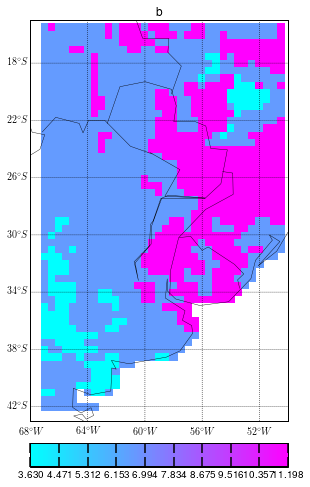

satcon


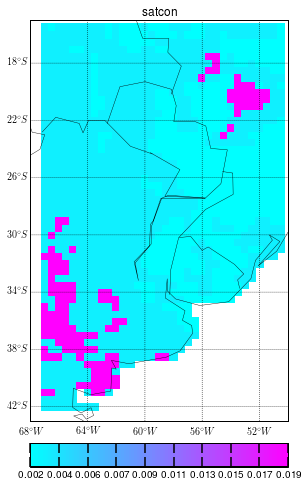

sathh


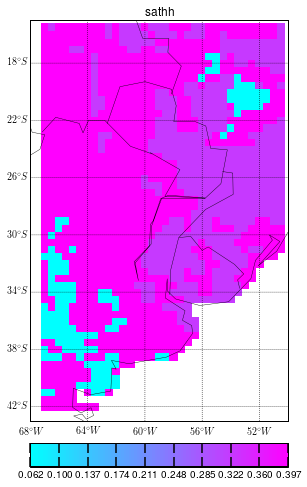

In [56]:
x_range=225,260
y_range=95,150

plot_lats=lats_2d[y_range[0]:y_range[1],x_range[0]:x_range[1]]
plot_lons=lons_2d[y_range[0]:y_range[1],x_range[0]:x_range[1]]

#for var in VG_DATA_DICT:
for var in ['b','satcon','sathh']:
    print(var)
    plot_data=VG_DATA_DICT[var][y_range[0]:y_range[1],x_range[0]:x_range[1]]
    PTs.plot_map(plot_data,plot_lons,plot_lats,PLOT_TITLE=var,iDISPLAY='Y',\
                    RESOLUTION='c',MPL_CBAR='cool',NLEVELS=100,NTICKS=10,\
                    LATDEL=4,LONDEL=4)
    plt.show()
    


In [34]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    -----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be a float
        array, a uint8 array or a PIL image. If `X` is an array, it
        can have the following shapes:
    
        - MxN -- luminance (grayscale, float array only)
        - MxNx3 -- RGB (float or uint8 array)
        - MxNx4 -- RGBA (float or uint8 array)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0; MxN float arrays may be
        normalised.
    
    cmap : `~matplotlib.colors.Colormap`, optional, default: None
        If None, d

In [19]:
lat_range=[-35.,-25.]
lat_lims= [ int(lat*2)+180 for lat in lat_range]
lon_range=[360.-63.,360.-58]
lon_lims= [ int(lon*2) for lon in lon_range]

print(lat_range, lat_lims)
print(lon_range, lon_lims)

[-35.0, -25.0] [110, 130]
[297.0, 302.0] [594, 604]


In [59]:
lat_range=[-10.,0.]
lat_lims= [ int(lat*2)+180 for lat in lat_range]
lon_range=[360.-63.,360.-58.]
lon_lims= [ int(lon*2) for lon in lon_range]

print(lat_range, lat_lims)
print(lon_range, lon_lims)

[-10.0, 0.0] [160, 180]
[297.0, 302.0] [594, 604]


In [60]:
fwetl_reg=EO_wetl[:,lat_lims[0]:lat_lims[1],lon_lims[0]:lon_lims[1]]
print(fwetl_reg.shape)

(180, 20, 10)


In [61]:
fwetl_mean_TS=np.mean(fwetl_reg.reshape(fwetl_reg.shape[0],-1),axis=1)
fwetl_median_TS=np.median(fwetl_reg.reshape(fwetl_reg.shape[0],-1),axis=1)
fwetl_max_TS=np.max(fwetl_reg.reshape(fwetl_reg.shape[0],-1),axis=1)

Thresh=0.3
fwetl_NgtThresh= [ len(np.where(fwetl_reg[itstep]>=Thresh)[0]) for itstep in range(nTIME)]


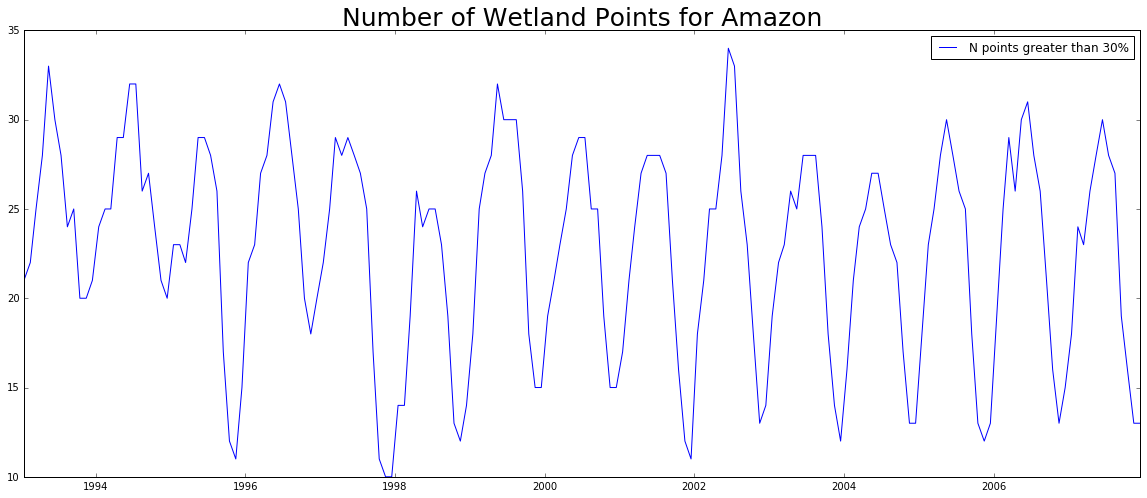

In [62]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
#ax.plot(time,fwetl_mean_TS,label='mean')
#ax.plot(time,fwetl_max_TS,label='max')
ax.plot(time,fwetl_NgtThresh,label='N points greater than 30%')
ax.set_title('Number of Wetland Points for Amazon',fontsize=25)
ax.legend()

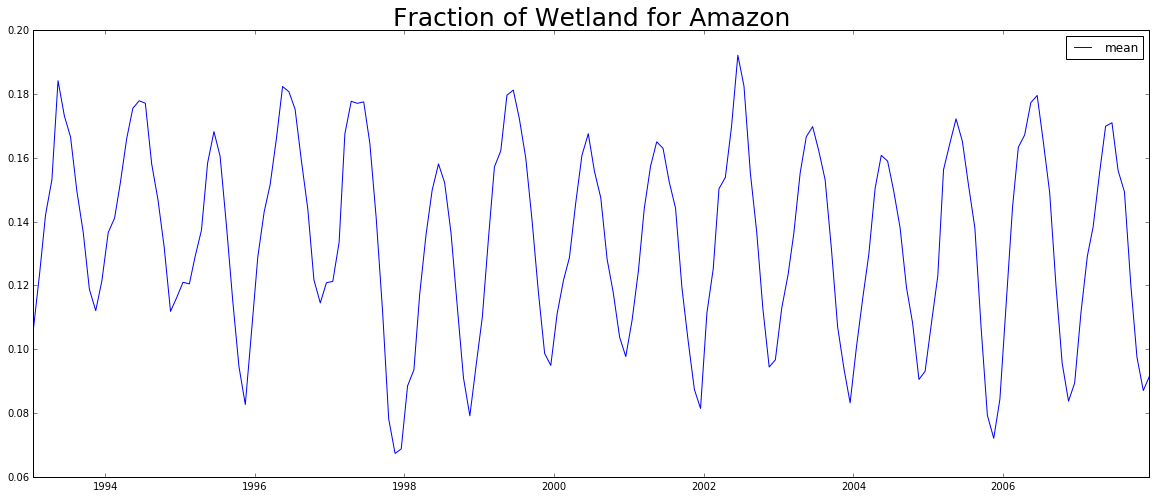

In [63]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
ax.plot(time,fwetl_mean_TS,label='mean')
#ax.plot(time,fwetl_max_TS,label='max')
#ax.plot(time,fwetl_NgtThresh,label='N points greater than 40%')
ax.set_title('Fraction of Wetland for Amazon',fontsize=25)
ax.legend()